# Explore Concepts needed for Lighting Controller

In [86]:
%matplotlib inline

import numpy as np
from PIL import Image, ImageDraw, ImageColor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import HTML
from IPython.display import Image as disp_Image
import colorsys
import re
import time

from model_helper import *
from display_helper import *


## Light Profiles

In [4]:
m = Model()
display( m.light_profile() )

{'Candle': {'temp': 1900, 'rgb': (255, 147, 41)},
 '40W Tungsten': {'temp': 2600, 'rgb': (255, 197, 143)},
 '100W Tungsten': {'temp': 2850, 'rgb': (255, 214, 170)},
 'Halogen': {'temp': 3200, 'rgb': (255, 241, 224)},
 'Carbon Arc': {'temp': 5200, 'rgb': (255, 250, 244)},
 'High Noon Sun': {'temp': 5400, 'rgb': (255, 255, 251)},
 'Direct Sunlight': {'temp': 6000, 'rgb': (255, 255, 255)},
 'Overcast Sky': {'temp': 7000, 'rgb': (201, 226, 255)},
 'Clear Blue Sky': {'temp': 20000, 'rgb': (64, 156, 255)}}

## Model Configuration

In [13]:
for c in m.MODEL_CONFIG:
    print(f"\n'{c}': (rows,cols)=({m.MODEL_CONFIG[c]['leds']['rows']},{m.MODEL_CONFIG[c]['leds']['cols']}) => LED ID array shape: {m.MODEL_CONFIG[c]['led_ids'].shape}")
    print(m.MODEL_CONFIG[c]['led_ids'])


'Left': (rows,cols)=(5,6) => LED ID array shape: (5, 6)
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]

'Right': (rows,cols)=(5,6) => LED ID array shape: (5, 6)
[[40 41 42 43 44 45]
 [46 47 48 49 50 51]
 [52 53 54 55 56 57]
 [58 59 60 61 62 63]
 [64 65 66 67 68 69]]

'Top': (rows,cols)=(2,3) => LED ID array shape: (2, 3)
[[30 31 32]
 [33 34 35]]


## Light Profiles on Simulated Model


Color Profile: Candle


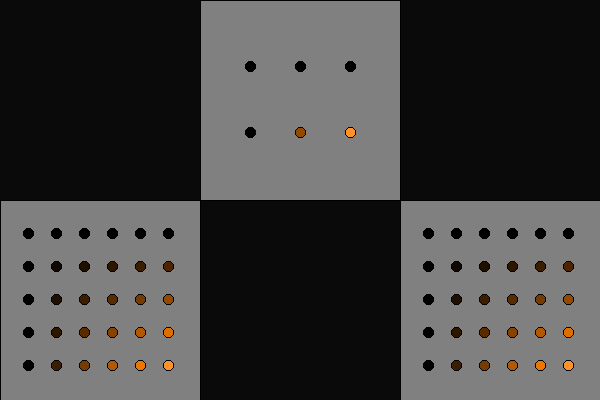


Color Profile: 40W Tungsten


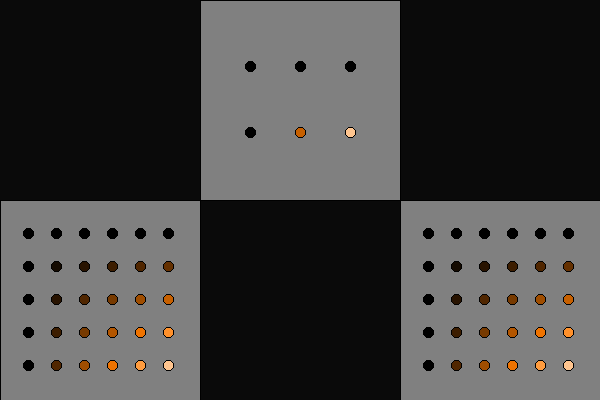


Color Profile: 100W Tungsten


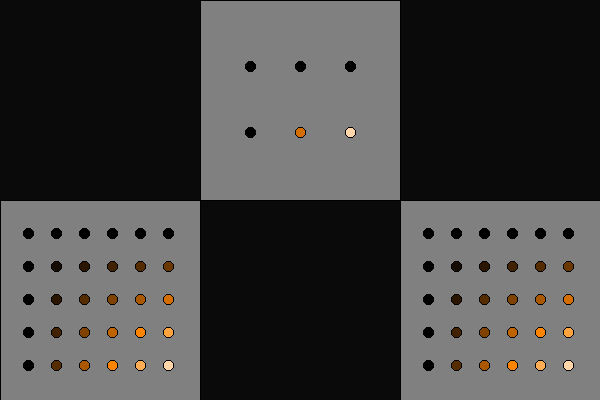


Color Profile: Halogen


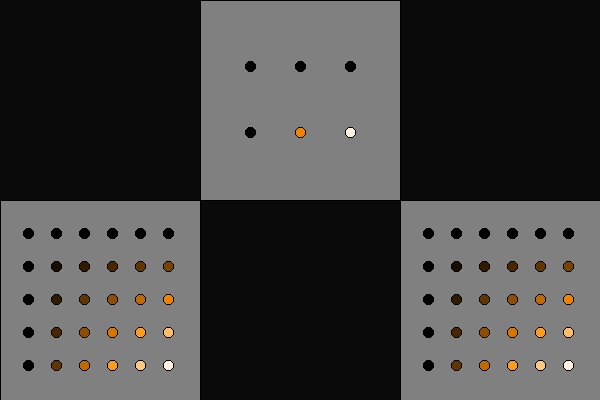


Color Profile: Carbon Arc


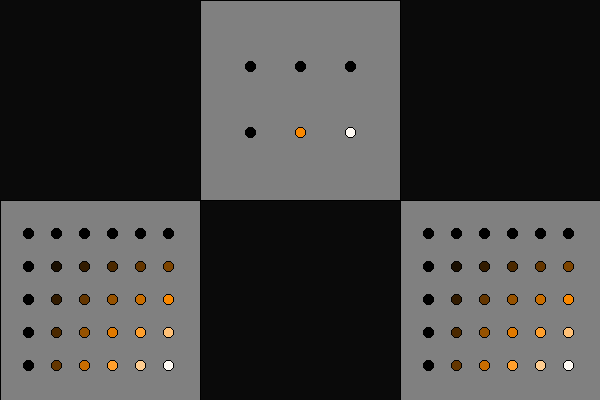


Color Profile: High Noon Sun


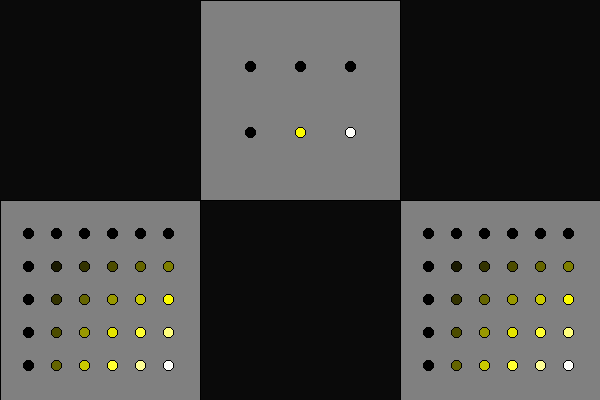


Color Profile: Direct Sunlight


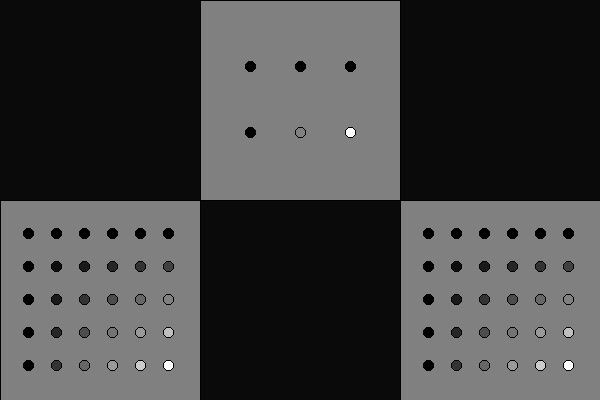


Color Profile: Overcast Sky


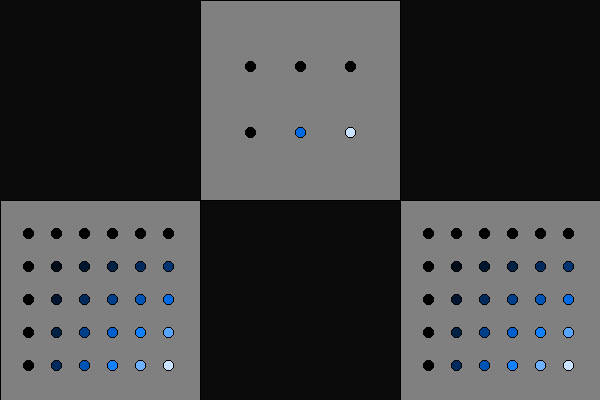


Color Profile: Clear Blue Sky


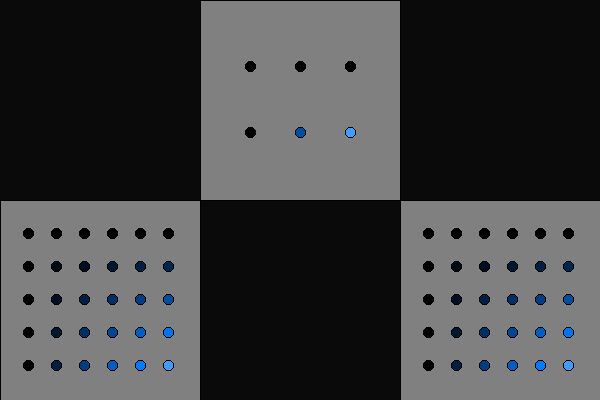

In [4]:
# Draw the model
m.draw_model_sides_top()

# Random LED brightness within color profile selection
for cp in m.LIGHT_PROFILE:
    print(f"\nColor Profile: {cp}")
    led_colors = m.led_test_pattern('Range', cp )    
    m.draw_model_leds( led_colors ) 
    display( m.model )


## Animation of Changing Light Profiles

Profile: Candle => rgb: (255, 147, 41) => hls: (0.083,0.580,1.000), hsv: (0.083,0.839,1.000)
Profile: 40W Tungsten => rgb: (255, 197, 143) => hls: (0.080,0.780,1.000), hsv: (0.080,0.439,1.000)
Profile: 100W Tungsten => rgb: (255, 214, 170) => hls: (0.086,0.833,1.000), hsv: (0.086,0.333,1.000)
Profile: Halogen => rgb: (255, 241, 224) => hls: (0.091,0.939,1.000), hsv: (0.091,0.122,1.000)
Profile: Carbon Arc => rgb: (255, 250, 244) => hls: (0.091,0.978,1.000), hsv: (0.091,0.043,1.000)
Profile: High Noon Sun => rgb: (255, 255, 251) => hls: (0.167,0.992,1.000), hsv: (0.167,0.016,1.000)
Profile: Direct Sunlight => rgb: (255, 255, 255) => hls: (0.000,1.000,0.000), hsv: (0.000,0.000,1.000)
Profile: Overcast Sky => rgb: (201, 226, 255) => hls: (0.590,0.894,1.000), hsv: (0.590,0.212,1.000)
Profile: Clear Blue Sky => rgb: (64, 156, 255) => hls: (0.586,0.625,1.000), hsv: (0.586,0.749,1.000)


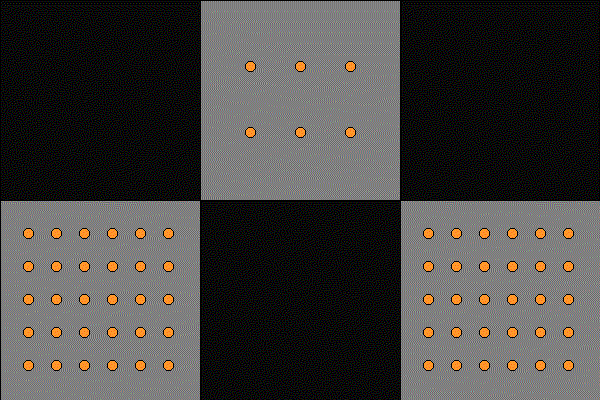

In [14]:
# Create a model
m = Model()

# Fill the model LEDs with a single specified color
def _helper_fill_leds( rgb:tuple ):
    led_cols = {}
    for c in m.MODEL_CONFIG:
        led_cols[c] = np.full( (m.MODEL_CONFIG[c]['leds']['rows'], m.MODEL_CONFIG[c]['leds']['cols']), fill_value=rgb_to_string( rgb ) ) 

    return led_cols

# Draw the sides and top of the model
m.draw_model_sides_top()

# Draw the LEDs for each color profile and then add them together as a GIF
images = []
for p in m.LIGHT_PROFILE:
    rgb = m.LIGHT_PROFILE[p]['rgb']
    hls = rgb_int_to_hls( rgb )
    hsv = rgb_int_to_hsv( rgb )
    print(f"Profile: {p} => rgb: {rgb} => hls: ({hls[0]:.3f},{hls[1]:.3f},{hls[2]:.3f}), hsv: ({hsv[0]:.3f},{hsv[1]:.3f},{hsv[2]:.3f})")

    lc = _helper_fill_leds( rgb )
    m.draw_model_leds( lc )
    images.append( m.model.copy() )

# Display the GIF
display_images( images, ms=500, loop=0 )

# Functions for Dynamic Lighting

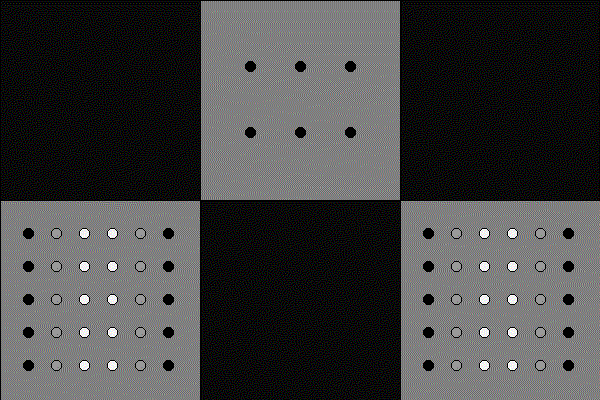

In [85]:
def update_led_pattern(self, timestep:int=None, distance:tuple=None, proximity:dict=None ):
      """
        Within the main loop, update the LED pattern that is currently
        running based upon the timestep that is specified
        """

        # Do what's needed to make one update to the LEDs based upon:
        # * The current scenario (and associated LED Pattern and Color Profile)
        # * The current timestep
        # * @TODO: Distance measured to objects in the Model
        # * @TODO: Proximity of objects to Entrance or Exit
        
        color_profile = self.MODEL_SCENARIO_CONFIG[self.scenario]['color_profile']
        led_pattern = self.MODEL_SCENARIO_CONFIG[self.scenario]['led_pattern']

        # Functions that implement LED patterns 
        PATTERN_FUNCTION = {
            'Come In': self._pattern_come_in
        }

        # Increment the LED pattern and return an array of RGB color strings for each Model component
        led_colors = self._increment_led_pattern( brightness_func=PATTERN_FUNCTION[led_pattern], timestep=timestep, color_profile=color_profile )

        # Update the LEDs (either physical LEDs or simulated LEDs)
        m.draw_model_leds( led_colors )


def _increment_led_pattern(self, brightness_func=None, timestep:int=0, color_profile:str='Direct Sunlight' ) -> np.ndarray:
    
    # Update LED brightness patterns for each Model component
    b_test = {}
    lc_test = {}
    for c in m.MODEL_CONFIG:

        # Component LED config
        rows = m.MODEL_CONFIG[c]['leds']['rows']
        cols = m.MODEL_CONFIG[c]['leds']['cols']

        # Create an array of the proper dimensions for this component of the model
        b_test[c] = np.zeros( (rows,cols) )

        # Set the LEDs to show the full range of brightness from 0.0 to 1.0 
        for row_ix in range(rows):
            for col_ix in range(cols):

                # Generate brightness levels based upon a supplied function
                b_test[c][row_ix,col_ix] = brightness_func( c, row_ix, col_ix, rows, cols, timestep )

        # Convert brightness levels to RGB strings
        lc_test[c] = m.map_led_brightness_to_rgb_string( b_test[c], color_profile )
        # print(f"'{c}': b_test {b_test[c].shape}, lc_test {lc_test[c].shape}")
    
    return lc_test

# ***************************************************
# Functions that define pattern brightness/behavior
# ***************************************************
def _pattern_come_in( self, c, r_ix, c_ix, n_r, n_c, t=0 ):
    b = None

    if c=='Right':
        # Cyclic brightness based upon column and timestep
        b = np.abs( np.sin( np.pi * ( (c_ix + t)/(n_c-1) ) ) ) if n_c > 1 else 1.0

    elif c=='Top':
        # Cyclic brightness based upon column and timestep
        b = np.abs( np.sin( np.pi * t/16 ) )

    elif c=='Left':
        # Cyclic brightness based upon column and timestep
        b = np.abs( np.sin( np.pi * ( (c_ix - t)/(n_c-1) ) ) ) if n_c > 1 else 1.0

        # Low to High Brightness based upon row and column
        # b = (float(r_ix)/(n_r-1) if n_r > 1 else 1.0) * (float(c_ix)/(n_c-1) if n_c > 1 else 1.0)

    return b



# Update the LED pattern
images = []
for t in range(32):
    led_colors = update_led_pattern( brightness_func=_helper_brightness, timestep=t, color_profile='Direct Sunlight' )
    m.draw_model_leds( led_colors )
    images.append( m.model.copy() )

# Display the GIF
display_images( images, ms=500, loop=0 )

In [53]:
N_COLS = 6
c_val = np.arange(N_COLS)
b_val = np.sin( np.pi * (c_val/N_COLS) )
print(f"c_val: {c_val}\ny: {b_val}")

c_val: [0 1 2 3 4 5]
y: [0.        0.5       0.8660254 1.        0.8660254 0.5      ]
